In [86]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Auxiliary Functions
def openCSV():
    columnsNames = ["userID","gameName","purchase","hours","delete"]
    return pd.read_csv("C:/Users/Matheus/Desktop/Github/GameRecommendationSystem/data/steamGames.csv", names=columnsNames)

In [18]:
# Open dataset
df = openCSV()
df.head()

,userID,gameName,purchase,hours,delete
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [19]:
# Filtering only for games played
df_filter = df.query("purchase == 'play'").drop(["purchase","delete"],axis = 1)
df_filter.head()

,userID,gameName,hours
1,151603712,The Elder Scrolls V Skyrim,273.0
3,151603712,Fallout 4,87.0
5,151603712,Spore,14.9
7,151603712,Fallout New Vegas,12.1
9,151603712,Left 4 Dead 2,8.9


## 1. A brief analysis of our dataset

In [77]:
# Most played games
mostPlayed = df_filter.groupby(["gameName"])["userID"].count().sort_values(ascending = False)


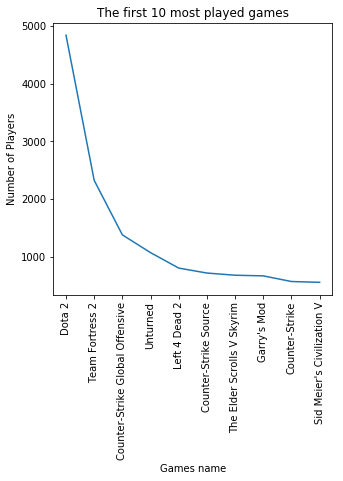

In [78]:
plt.figure(figsize=(5,5))
plt.plot(mostPlayed.keys()[:10],mostPlayed[:10]);
plt.xticks(rotation = 90);
plt.title("The first 10 most played games");
plt.xlabel("Games name");
plt.ylabel("Number of Players");

In [79]:
# Number of hours of most played games
hoursPlayed = df_filter.groupby(["gameName"])["hours"].sum().sort_values(ascending = False)

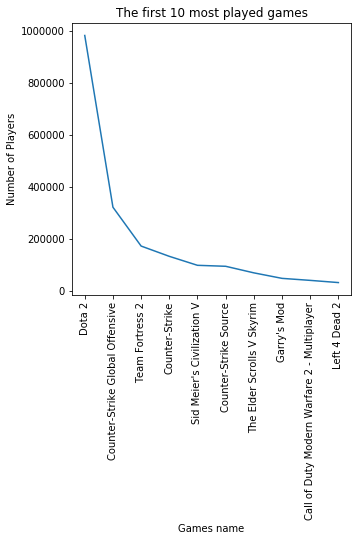

In [80]:
plt.figure(figsize=(5,5))
plt.plot(hoursPlayed.keys()[:10],hoursPlayed[:10]);
plt.xticks(rotation = 90);
plt.title("The first 10 most played games");
plt.xlabel("Games name");
plt.ylabel("Number of Players");

In [81]:
# Number of Games
numberGames = df_filter.groupby(["userID"])["gameName"].count().sort_values(ascending = False)
userNameString = [str(x) for x in numberGames.keys()[:10]]

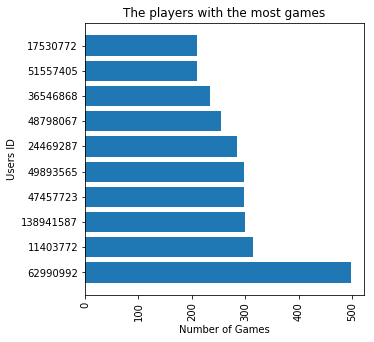

In [82]:
plt.figure(figsize=(5,5))
plt.barh(userNameString,numberGames[:10]);
plt.xticks(rotation = 90);
plt.title("The players with the most games");
plt.xlabel("Number of Games");
plt.ylabel("Users ID");

## 2. Conclusion

### Game Distribution

The graphs generated above have a statistical distribution characterized by Long Tail or Fat Tail. This distribution in our context of a recommendation system is very important to note because, as can be seen in the graph the first 20% of games, are responsible for almost 80% of the distribution area. And this is very obvious, because the number of "popular" games is much smaller than the total amount of existing games, and those games hold the most players. Therefore, less popular games are much less played.

Since we have games that almost or never were played, so I will remove them and work with only the 20% of the most played games. Taking around 720 games for the creation of our recommendation system.


### Modeling

The model I will present in this early phase of the recommendation system is a collaborative item filtering model, using KNN as our classifier.